# 以二次迴歸預測世界人口數

## 載入套件

In [1]:
import numpy as np
import pandas as pd

## 載入資料集

In [3]:
df = pd.read_csv("./data/population.csv")
X, y = df[["year"]].values, df["pop"].values

## 使用 NumPy polyfit 計算

In [4]:
coef = np.polyfit(X.reshape(-1), y, deg=2)
print(f"y={coef[0]} X^2 + {coef[1]} X + {coef[2]}")

y=-0.0002668845596211802 X^2 + 1.1420418251273352 X + -1210.2427271944966


## 繪圖

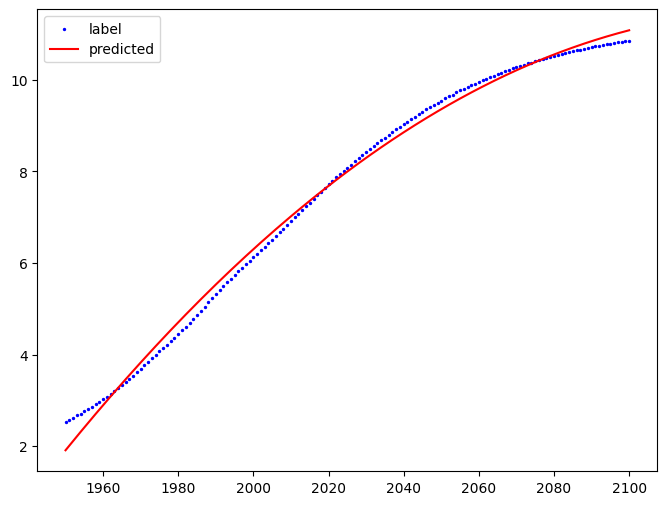

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.scatter(df["year"], y, c="blue", marker="o", s=2, label="label")

plt.plot(
    df["year"].values,
    (df["year"] ** 2) * coef[0] + df["year"] * coef[1] + coef[2],
    c="red",
    label="predicted",
)
plt.legend();

## 使用公式預測2050年人口數

In [6]:
print((2050**2) * coef[0] + 2050 * coef[1] + coef[2])

9.360652508530848


## 產生 X 平方項，並與X合併

In [7]:
X_2 = X**2
X_new = np.concatenate((X_2, X), axis=1)
X_new.shape

(151, 2)

## 使用Scikit-Learn LinearRegression類別驗算

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_new, y)
lr.coef_, lr.intercept_

(array([-2.66884560e-04,  1.14204183e+00]), -1210.242727194026)

## 使用公式預測2050年人口數

In [9]:
print((2050**2) * lr.coef_[0] + 2050 * lr.coef_[1] + lr.intercept_)

9.36065250853244
